<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")

Ingresa tu nombre completo: Sebastián Flórez Jaramillo
Ingresa tu correo electrónico: sebastian.florezj@udea.edu.co

Resumen de datos ingresados:
Nombre: Sebastián Flórez Jaramillo
Correo electrónico: sebastian.florezj@udea.edu.co


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.

<p align="center">
    <img src="imgs\sp_3_e1.png" alt="sp_3_e1" width="600"  height="400">
</p>


In [1]:
#Importación de librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
#Carga y limpieza dataframe

df = sns.load_dataset("penguins")
df.dropna(inplace=True, axis=0)

In [22]:
df_selected_columns = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [23]:
#Estandararización y PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(df_selected_columns)

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [24]:
#Variable de salida o target

df_selected_columns["species"] = df["species"]
df_selected_columns.head()

/tmp/ipython-input-3722540792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_columns["species"] = df["species"]


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


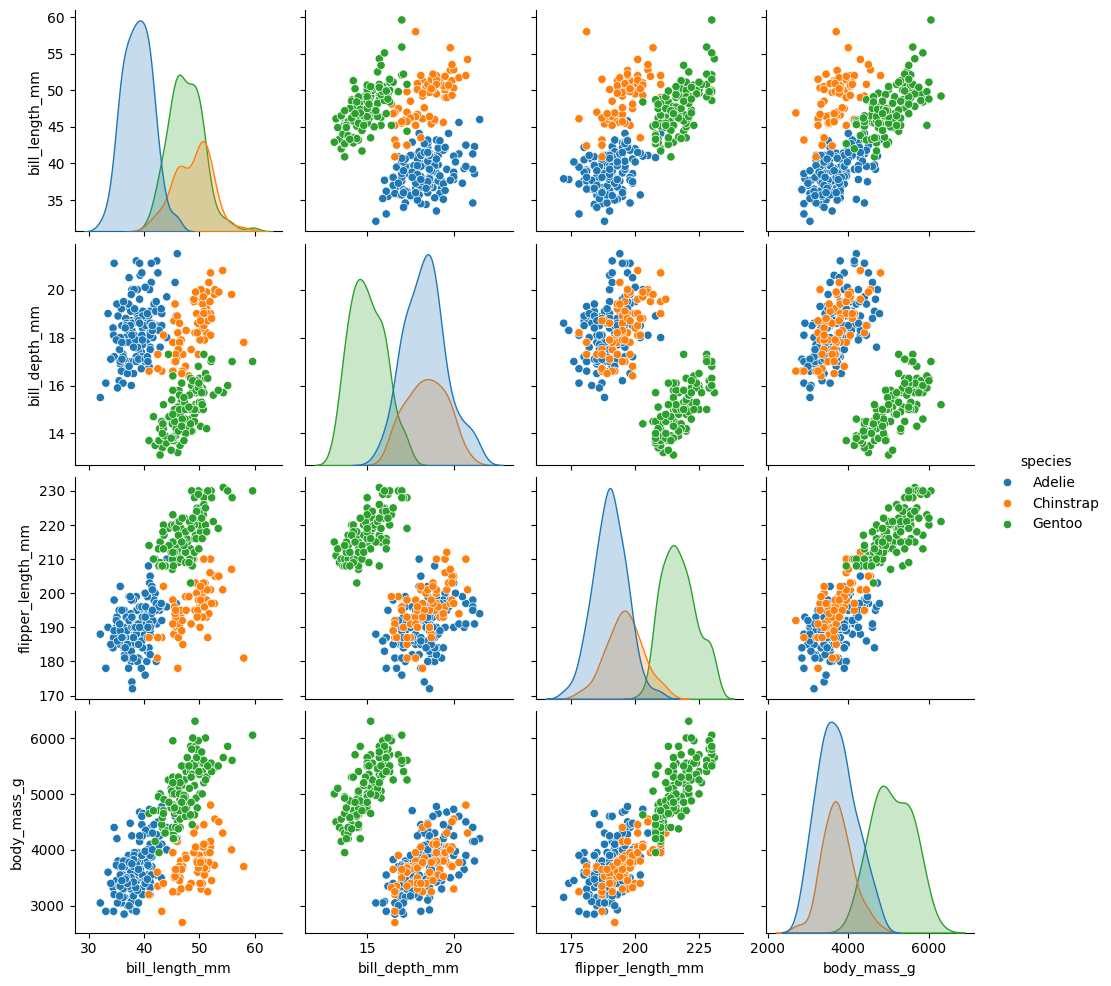

In [ ]:
#Visualización

sns.pairplot(df_selected_columns, hue="species")
plt.show()

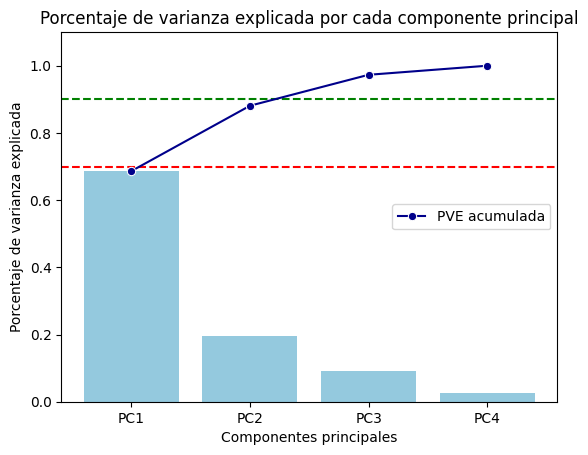

In [25]:
#Seleccion de componentes

PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
x_ = [f"PC{i+1}"for i in range(len(pca.components_))]

sns.barplot(x = x_, y=PVE, color="skyblue")
plt.ylim(0, 1.1)
plt.ylabel("Porcentaje de varianza explicada")
plt.xlabel("Componentes principales")
plt.title("Porcentaje de varianza explicada por cada componente principal")
plt.axhline(0.7, color="red", linestyle="--")
plt.axhline(0.9, color="green", linestyle="--")
sns.lineplot(x = x_, y=PVE_acum, marker="o", color="darkblue", label="PVE acumulada")
plt.legend(loc="center right")
plt.show()

In [27]:
pca.components_

array([[ 0.45375317, -0.39904723,  0.576825  ,  0.54967471],
       [ 0.6001949 ,  0.79616951,  0.00578817,  0.07646366],
       [ 0.64249509, -0.42580043, -0.23609516, -0.59173738],
       [-0.14516955,  0.1599044 ,  0.78198369, -0.58468615]])

In [42]:
#Ecuaciones
#Se seleccionaron los componentes 1 y 2

print("Ecuaciones de los componentes principales:\n")
componentes = pca.components_[:2].copy()
for i in range(len(componentes)):
    ecuacion = ""
    for j in range(len(componentes[0])):
      pesos = componentes[i]
      signo = "+" if pesos[j] > 0 else "-"
      pesos[j] = abs(pesos[j])
      ecuacion += f" {signo} {pesos[j]:.3f} * ({df_selected_columns.columns[j]})"
      if j == 0:
          ecuacion = ecuacion[2:]
          if signo == "-":
              ecuacion = "-" + ecuacion[1:]
    print(f"PC{i+1} = {ecuacion}")

Ecuaciones de los componentes principales:

PC1 =  0.454 * (bill_length_mm) - 0.399 * (bill_depth_mm) + 0.577 * (flipper_length_mm) + 0.550 * (body_mass_g)
PC2 =  0.600 * (bill_length_mm) + 0.796 * (bill_depth_mm) + 0.006 * (flipper_length_mm) + 0.076 * (body_mass_g)


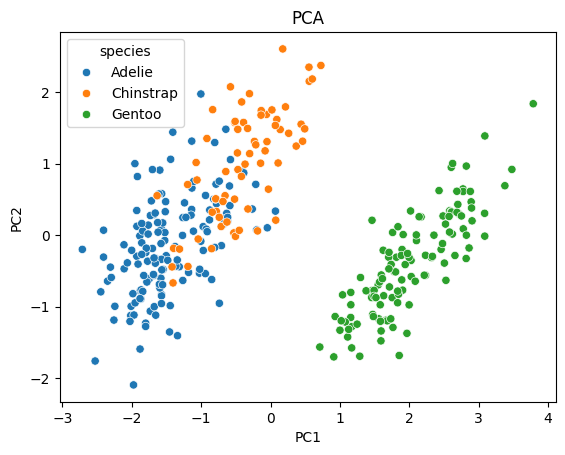

In [ ]:
df_pca = pd.DataFrame(X_pca[:,:2], columns=["PC1", "PC2"])
df_selected_columns.reset_index(drop=True, inplace=True)
df_pca["species"] = df_selected_columns["species"]

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="species")
plt.title("PCA")
plt.show()

### La especie "Gentoo" es visiblemente más diferenciable según los valores de PC1 Y PC2

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

<p align="center">
    <img src="imgs\sp_3_e2.png" alt="sp_3_e2" width="600"  height="400">
</p>



In [45]:
#Importación de librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
#Carga dataset

df = pd.DataFrame(sns.load_dataset("diamonds"))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
#Definición valores de x e y

df_x = df[["carat", "depth", "table", "x", "y", "z"]]
df_y = df["price"]

In [48]:
#División de datos

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [49]:
#Modelo

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:01:13   Log-Likelihood:            -3.7672e+05
No. Observations:               43152   AIC:                         7.534e+05
Df Residuals:                   43145   BIC:                         7.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+04    497.170     42.192      0.0

<Figure size 600x400 with 0 Axes>

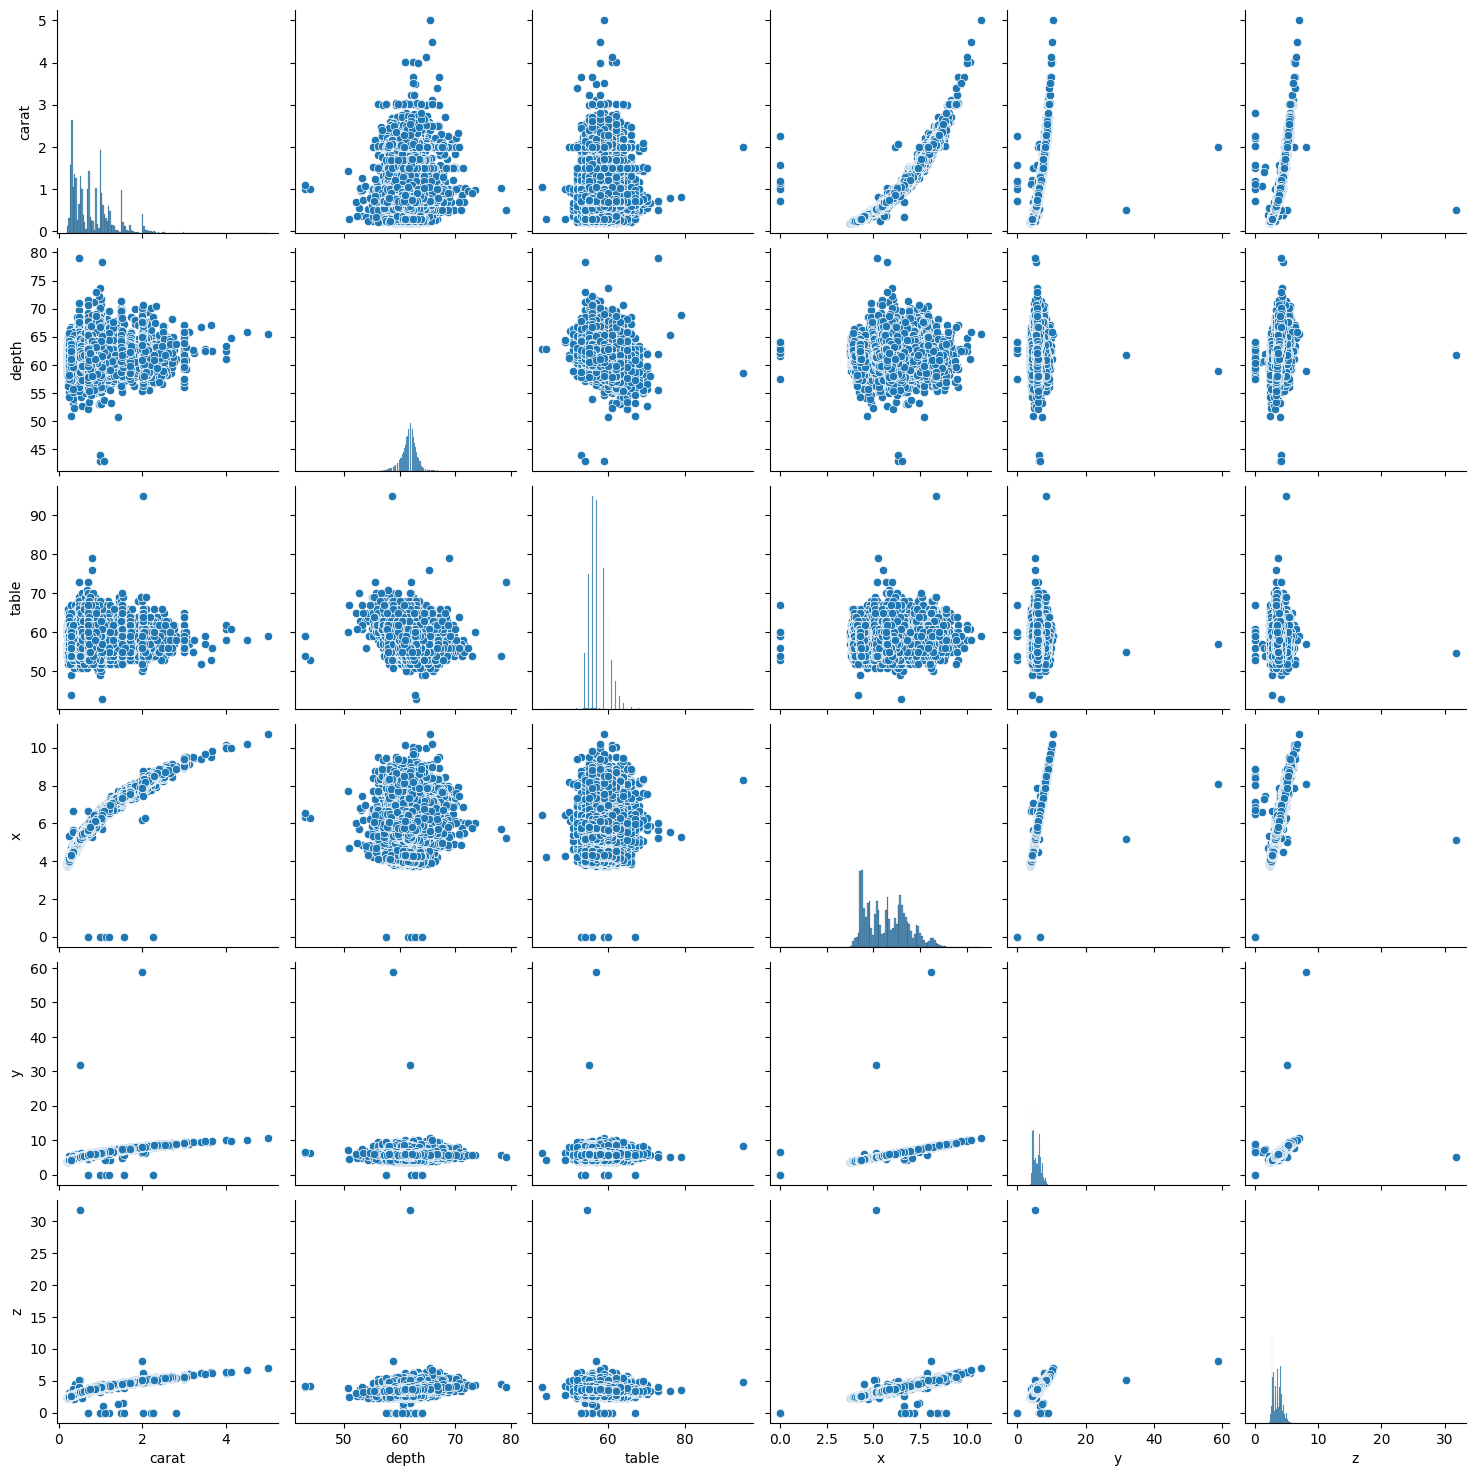

In [ ]:
#Comportamiento entre variables

plt.figure(figsize=(6, 4))
sns.pairplot(df_x)
plt.show()

In [81]:
#Validación del modelo según métricas de ajuste

Y_pred = model.predict(sm.add_constant(X_test))

rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
r2 = r2_score(y_test, model.predict(sm.add_constant(X_test)))


print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 1497.391
R²: 0.859


In [92]:
y_test.describe()

,price
count,10788.000000
mean,3906.035780
std,3987.266627
min,335.000000
25%,932.750000
50%,2398.000000
75%,5247.500000
max,18823.000000


#### Interpretación
Según el R² = 0,859 el modelo explica bien la variabilidad de los datos. Sin embargo, la cantidad restante se puede deber a que no se tomaron las variables categóricas como corte y color que en el contexto de los diamantes son determinantes del precio.

Por otro lado, el RMSE = 1.497 USD que nos dice el error promedio de predicción, es alto para una porción de datos de test con media, mínimo y máximo de 3.906 USD, 335 USD y 18.823 USD respectivamente. Teniendo en cuenta esto además del valor de Q3 = 5.247 USD sería adecuado pensar en que los datos tienen gran precencia de outliers además de que se pueden plantear por lo menos 2 modelos para rangos diferentes de precios.

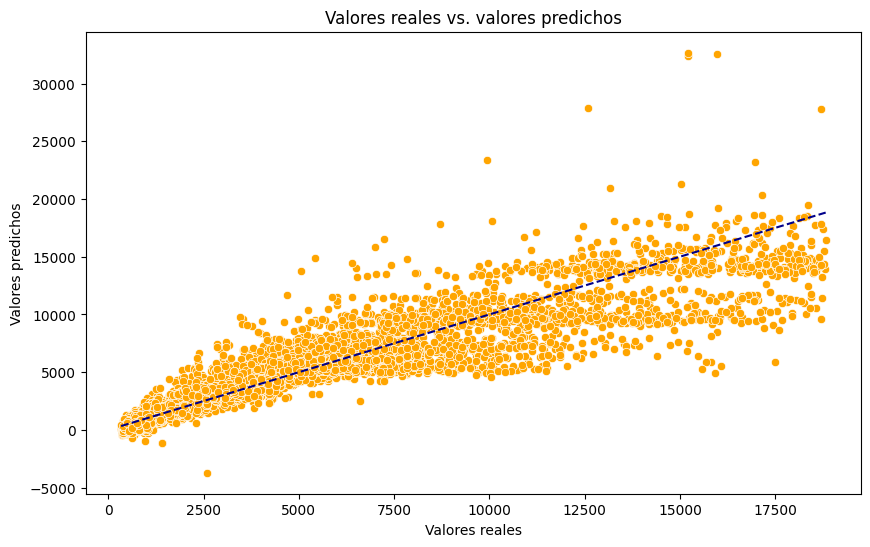

In [79]:
#Comparación reales vs predichos

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=Y_pred, color="orange")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="darkblue", linestyle="--")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. valores predichos")
plt.show()



Esta gráfica nos muestra presencia de outliers además de que el modelo predice valores de precios negativos, lo cual no es posible. Esto refuerza la invalidez del modelo y la necesidad de limpieza de datos.